   DumbKNN  Dim    N   K      Time
0  DumbKNN    1  100   1   9459.67
1  DumbKNN    1  100   5  10256.00
2  DumbKNN    1  100  10  12360.70
3  DumbKNN    1  100  20  15243.00
4  DumbKNN    1  100  50  13393.30
   BucketKNN  Dim    N   K     Time
0  BucketKNN    1  100   1  74224.3
1  BucketKNN    1  100   5  73999.7
2  BucketKNN    1  100  10  74295.3
3  BucketKNN    1  100  20  74137.3
4  BucketKNN    1  100  50  74205.3
   Quadtree  Dim    N   K     Time
0  Quadtree    2  100   1  12724.3
1  Quadtree    2  100   5  14800.0
2  Quadtree    2  100  10  17691.7
3  Quadtree    2  100  20  19567.7
4  Quadtree    2  100  50  19174.0
   KDTree  Dim    N   K       Time
0  KDTree    1  100   1    562.333
1  KDTree    1  100   5  12200.000
2  KDTree    1  100  10  13470.000
3  KDTree    1  100  20  14408.000
4  KDTree    1  100  50  14001.300


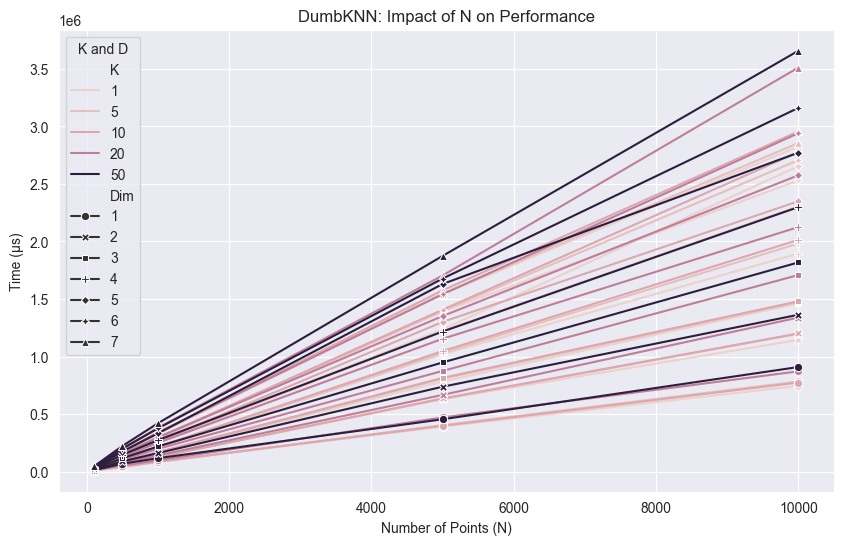

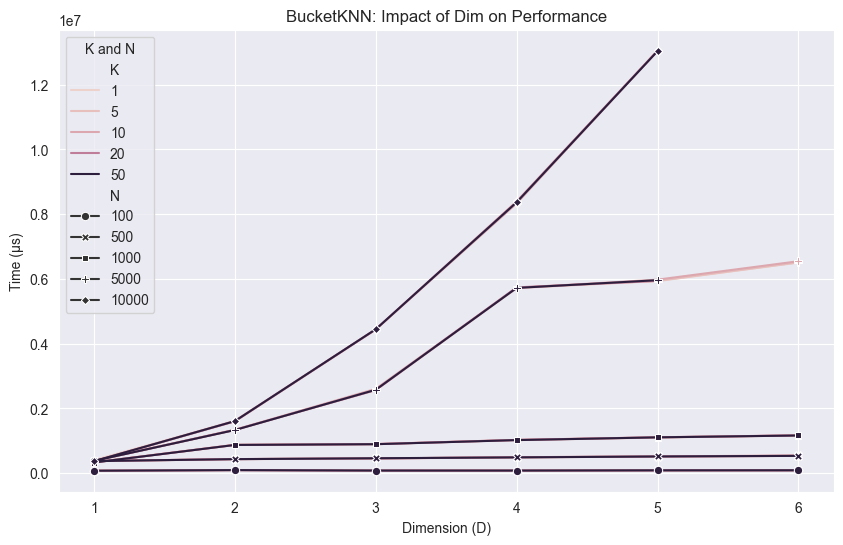

Coefficients: [   202.75991937   3096.71170797 135493.45912857]
Intercept: -571554.449222733


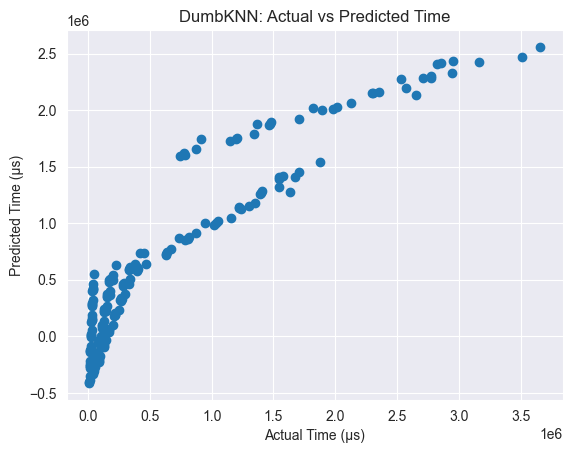

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load CSV files

dumb_knn_df = pd.read_csv('/Users/ryliebyers/CS6017/HW4/spatialDatastructuresStarterCode/DumbKNN.csv')
bucket_knn_df = pd.read_csv('/Users/ryliebyers/CS6017/HW4/spatialDatastructuresStarterCode/BucketKNN.csv')
quadtree_df = pd.read_csv('/Users/ryliebyers/CS6017/HW4/spatialDatastructuresStarterCode/Quadtree.csv')
kdtree_df = pd.read_csv('/Users/ryliebyers/CS6017/HW4/spatialDatastructuresStarterCode/KDTree.csv')

# Exploratory Data Analysis
print(dumb_knn_df.head())
print(bucket_knn_df.head())
print(quadtree_df.head())
print(kdtree_df.head())

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(data=dumb_knn_df, x='N', y='Time', hue='K', style='Dim', markers=True, dashes=False)
plt.title('DumbKNN: Impact of N on Performance')
plt.xlabel('Number of Points (N)')
plt.ylabel('Time (µs)')
plt.legend(title='K and D')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=bucket_knn_df, x='Dim', y='Time', hue='K', style='N', markers=True, dashes=False)
plt.title('BucketKNN: Impact of Dim on Performance')
plt.xlabel('Dimension (D)')
plt.ylabel('Time (µs)')
plt.legend(title='K and N')
plt.show()

# Regression Analysis
X = dumb_knn_df[['N', 'K', 'Dim']]
y = dumb_knn_df['Time']

model = LinearRegression()
model.fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('Actual Time (µs)')
plt.ylabel('Predicted Time (µs)')
plt.title('DumbKNN: Actual vs Predicted Time')
plt.show()






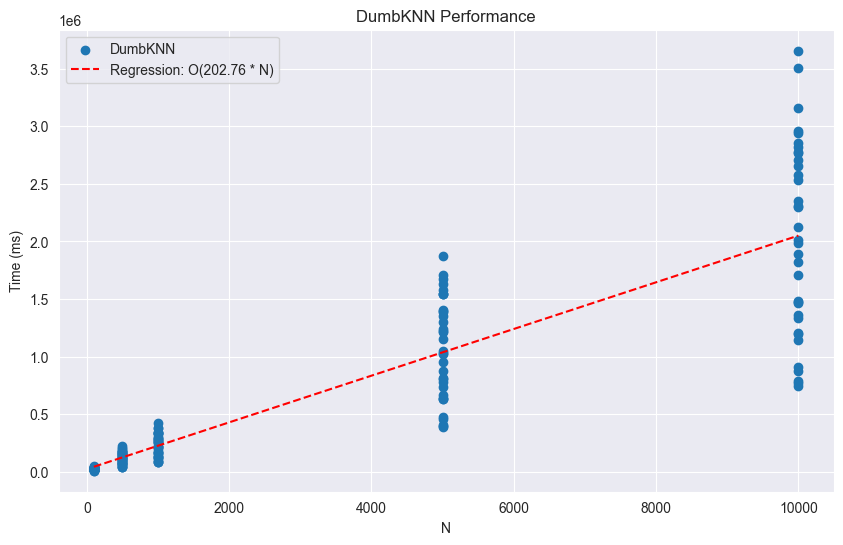

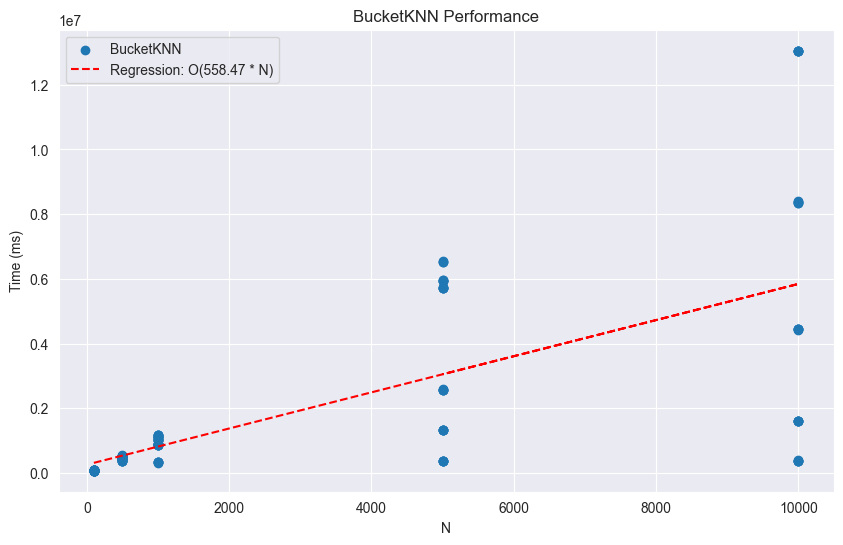

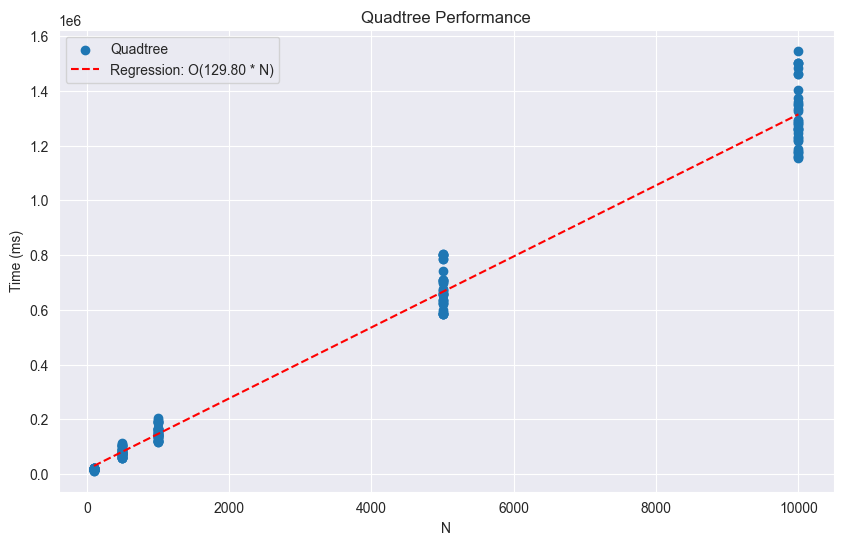

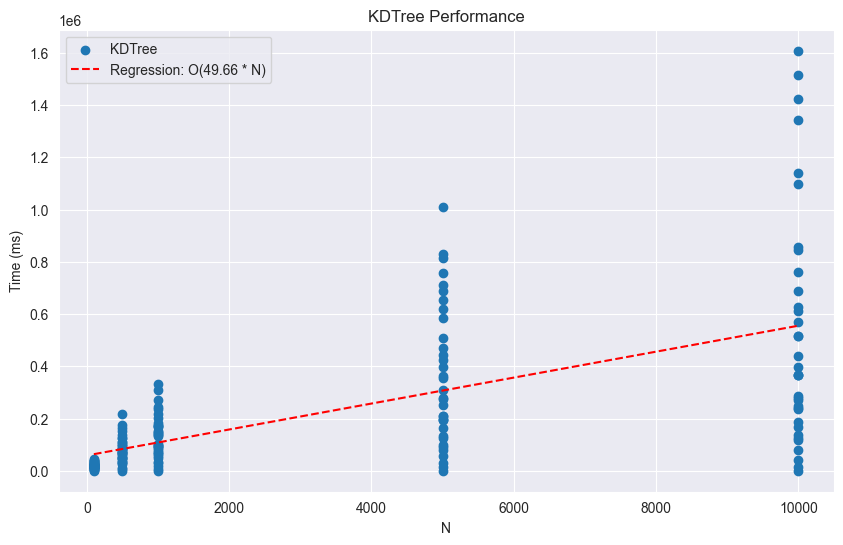

In [25]:
# Function to plot and estimate Big-O
def plot_and_estimate_big_o(df, algorithm, x_col, y_col):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_col], df[y_col], marker='o', label=algorithm)
    plt.xlabel(f'{x_col}')
    plt.ylabel(f'{y_col} (ms)')
    plt.title(f'{algorithm} Performance')

    # Perform linear regression to estimate Big-O
    X = np.array(df[x_col]).reshape(-1, 1)
    y = np.array(df[y_col])
    regression = LinearRegression()
    regression.fit(X, y)

    # Plot regression line
    plt.plot(X, regression.predict(X), color='red', linestyle='--', label=f'Regression: O({regression.coef_[0]:.2f} * {x_col})')

    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting for each algorithm and each parameter
plot_and_estimate_big_o(dumb_knn_df, 'DumbKNN', 'N', 'Time')
plot_and_estimate_big_o(bucket_knn_df, 'BucketKNN', 'N', 'Time')
plot_and_estimate_big_o(quadtree_df, 'Quadtree', 'N', 'Time')
plot_and_estimate_big_o(kdtree_df, 'KDTree', 'N', 'Time')

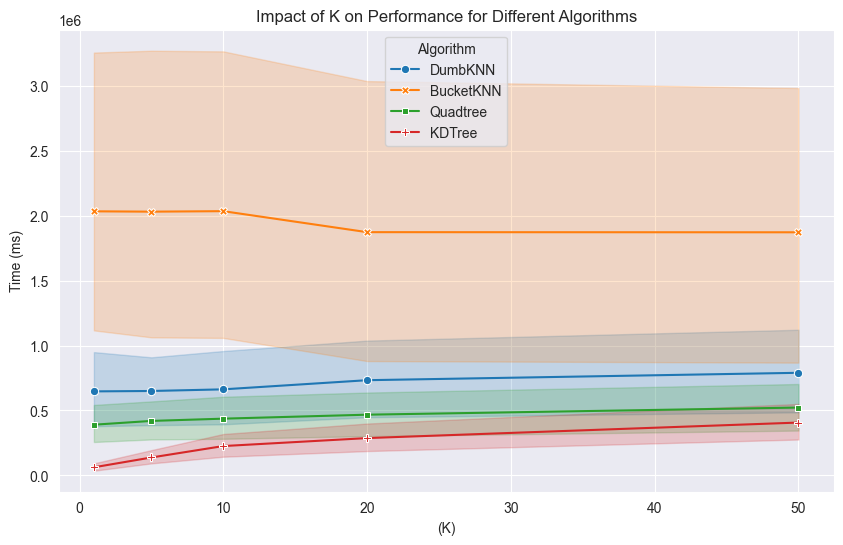

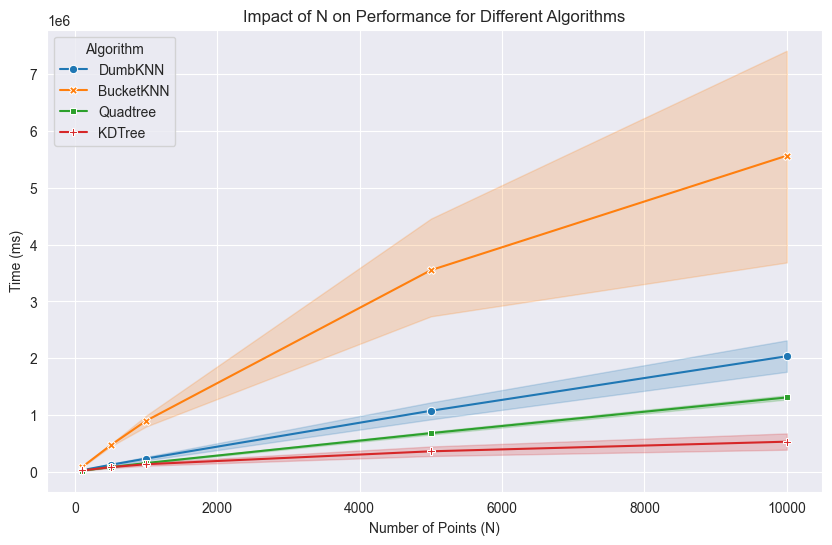

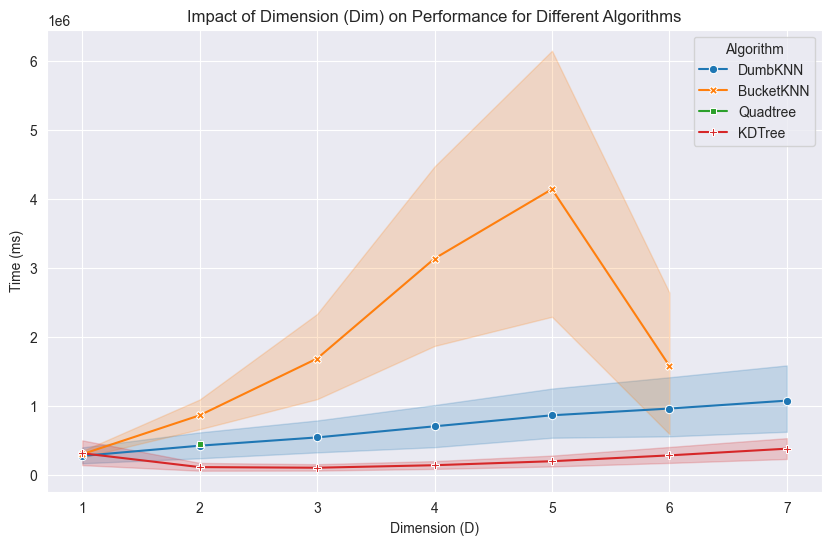

In [26]:
# Ensure consistent column names and structure
dumb_knn_df.columns = ['Algorithm', 'Dim', 'N', 'K', 'Time']
bucket_knn_df.columns = ['Algorithm', 'Dim', 'N', 'K', 'Time']
quadtree_df.columns = ['Algorithm', 'Dim', 'N', 'K', 'Time']
kdtree_df.columns = ['Algorithm', 'Dim', 'N', 'K', 'Time']

# Combine all dataframes
combined_df = pd.concat([dumb_knn_df, bucket_knn_df, quadtree_df, kdtree_df], ignore_index=True)

# Plotting for K vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='K', y='Time', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Impact of K on Performance for Different Algorithms')
plt.xlabel('(K)')
plt.ylabel('Time (ms)')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()

# Plotting for N vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='N', y='Time', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Impact of N on Performance for Different Algorithms')
plt.xlabel('Number of Points (N)')
plt.ylabel('Time (ms)')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()

# Plotting for Dim vs Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x='Dim', y='Time', hue='Algorithm', style='Algorithm', markers=True, dashes=False)
plt.title('Impact of Dimension (Dim) on Performance for Different Algorithms')
plt.xlabel('Dimension (D)')
plt.ylabel('Time (ms)')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()

 # what impact to K, N, D, and the data structure have?

The first graph shows the impact of k. Kon the performance of different algorithms as K increases, the running time for all algorithms shows a slight increase, but the overall trends are relatively flat.
The second graph shows the impact of N on the performance. As N increases, the running time increases significantly for all algorithms, with DumbKNN and BucketKNN showing the steepest growth.
Higher dimensions tend to perform better. BucketKnn increased significantly. 

# Do tests confirm or disprove our expectations? What running times do you expect to see based on simple big-O analysis?

 Based on Big-O analysis, increasing k would have a linear impact on the running time, since each additional nearest neighbor requires more comparisons. The tests confirm our expectations. The performance remains relatively stable with a slight increase, which is consistent with the linear complexity with respect to k.
Running times should increase linearly for DumbKNN. While KDTree and QuadTree should be logarithmic. KDTree and QuadTree have lower times as expected from logarithmic complexity. Higher dimensions tend to perform better. BucketKnn increased significantly in all the graphs.

Running times to expect:
DumbKNN: O(N)
BucketKNN: O(N)
QuadTree: O(N log N)
KDTree: O(N log N)

# Are there any aspects of your data that seem unusual? Can you explain them?


BucketKnn is significantly higher in the graphs above. Which could be from instability or inefficiencies. 